identification of hand written digits using Deep learning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

It means each sample is 28*28 pixel image

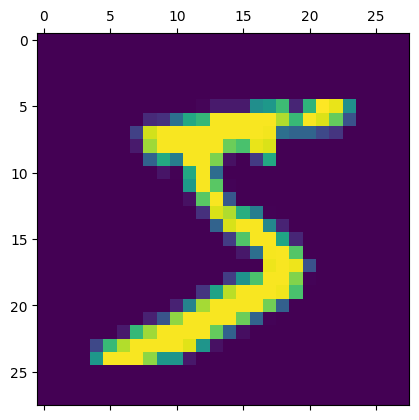

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
x_train=x_train/255
x_test=x_test/255

In [20]:
x_train_flattened=x_train.reshape((len(x_train),28*28))
x_test_flattened=x_test.reshape((len(x_test),28*28))

In [21]:
x_train_flattened.shape

(60000, 784)

In [22]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
model=keras.Sequential([
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4708 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2666 - accuracy: 0.9263


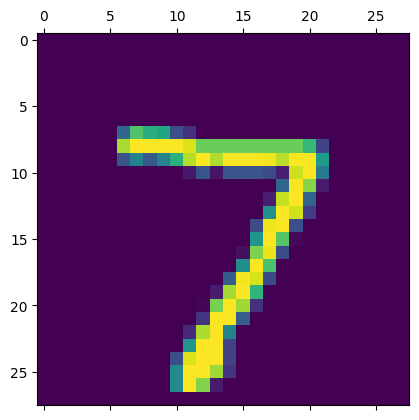

In [24]:
plt.matshow(x_test[0])

In [26]:
y_pred=model.predict(x_test_flattened)
y_pred[0]

313/313 [==============================] - 3s 7ms/step


array([2.30200682e-02, 3.23442436e-07, 6.31783605e-02, 9.42570031e-01,
       1.47531705e-03, 1.10042065e-01, 1.85047975e-06, 9.99829531e-01,
       9.59566757e-02, 6.78111196e-01], dtype=float32)

In [27]:
np.argmax(y_pred[0])

7

In [28]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
cm=tf.math.confusion_matrix(y_test, y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1116,    4,    1,    0,    1,    4,    2,    7,    0],
       [   8,    9,  929,   15,    6,    2,   12,   10,   36,    5],
       [   5,    0,   25,  907,    0,   30,    2,   13,   19,    9],
       [   1,    1,    5,    0,  892,    0,   15,    5,    9,   54],
       [  11,    3,    3,   19,    8,  788,   19,    7,   27,    7],
       [  11,    3,    7,    1,    7,    9,  917,    2,    1,    0],
       [   1,    6,   24,    2,    3,    0,    0,  961,    2,   29],
       [   8,    9,    7,   18,    8,   30,   11,   14,  860,    9],
       [  11,    7,    1,    8,   14,    8,    0,   28,    4,  928]],
      dtype=int32)>

Text(70.72222222222221, 0.5, 'Truth')

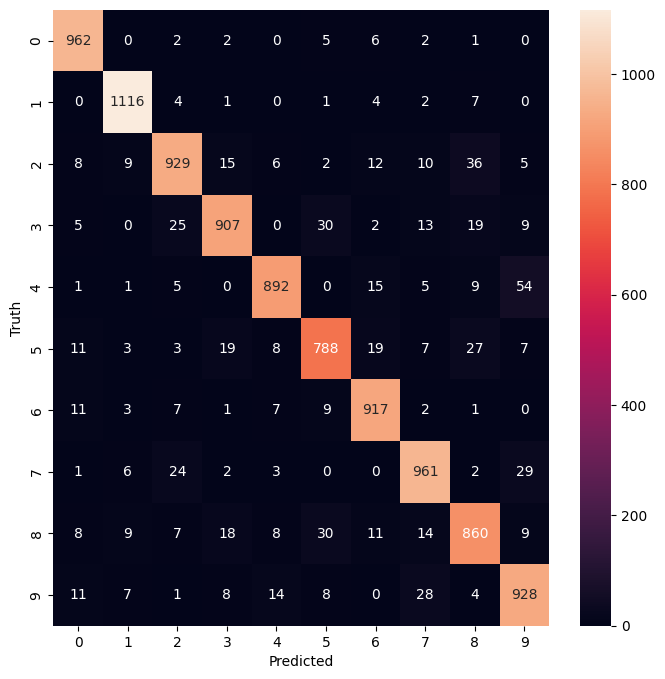

In [30]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model=keras.Sequential([
        keras.layers.Dense(100, input_shape=(784,), activation='relu'
        ),
        keras.layers.Dense(10, activation='sigmoid')

        ]
        )
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2700 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1246 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0884 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0537 - accuracy: 0.9832


In [33]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9764


[0.07730744034051895, 0.9764000177383423]

313/313 [==============================] - 1s 2ms/step


Text(70.72222222222221, 0.5, 'Truth')

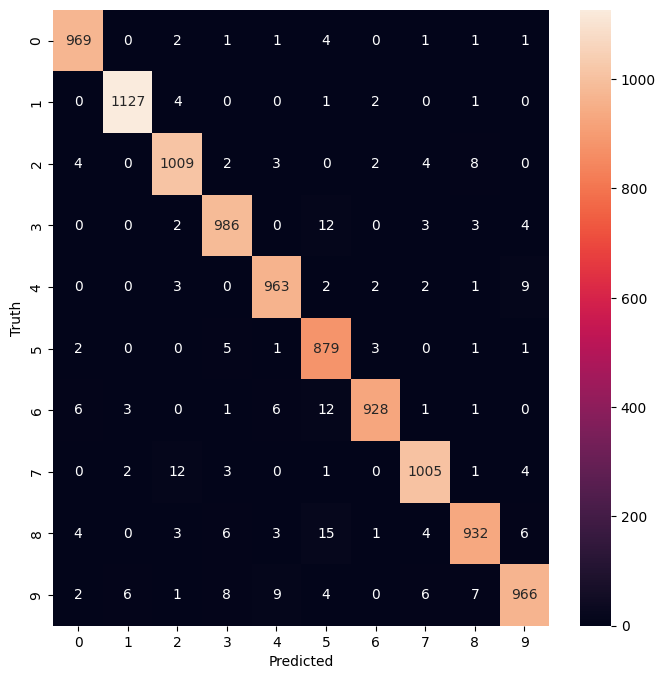

In [34]:
y_pred=model.predict(x_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(y_test, y_pred_labels)
cm
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')